In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/kyungyunlee/Desktop/ IRP reference/Data/final_comparison.csv")
df

,step,video,accel
0,0,5.554502,5.855149
1,5,5.798855,5.864104
2,10,5.946825,5.867571
3,15,5.982464,5.870358
4,20,6.265037,5.876516
5,25,6.277508,5.882580
6,30,6.308421,5.906539
7,35,6.371583,5.906502
8,40,6.456995,5.929871


In [5]:
df["video_gap"] = df["video"] - df["video"].shift()
df["accel_gap"] = df["accel"] - df["accel"].shift()
df

,step,video,accel,video_gap,accel_gap
0,0,5.554502,5.855149,NaN,NaN
1,5,5.798855,5.864104,0.244353,0.008955
2,10,5.946825,5.867571,0.147970,0.003467
3,15,5.982464,5.870358,0.035639,0.002787
4,20,6.265037,5.876516,0.282573,0.006157
5,25,6.277508,5.882580,0.012471,0.006065
6,30,6.308421,5.906539,0.030914,0.023959
7,35,6.371583,5.906502,0.063162,-0.000037
8,40,6.456995,5.929871,0.085412,0.023370


In [6]:
df.corr()

,step,video,accel,video_gap,accel_gap
step,1.000000,0.959928,0.956033,-0.518879,0.463591
video,0.959928,1.000000,0.865966,-0.393109,0.408070
accel,0.956033,0.865966,1.000000,-0.442977,0.644957
video_gap,-0.518879,-0.393109,-0.442977,1.000000,-0.163148
accel_gap,0.463591,0.408070,0.644957,-0.163148,1.000000


In [7]:
df["corr_vid_accel"] = df.corr().iloc[2, 1]
df["corr_step_vid"] = df.corr().iloc[0, 1]
df["corr_step_accel"] = df.corr().iloc[0, 2]
df

,step,video,accel,video_gap,accel_gap,corr_vid_accel,corr_step_vid,corr_step_accel
0,0,5.554502,5.855149,NaN,NaN,0.865966,0.959928,0.956033
1,5,5.798855,5.864104,0.244353,0.008955,0.865966,0.959928,0.956033
2,10,5.946825,5.867571,0.147970,0.003467,0.865966,0.959928,0.956033
3,15,5.982464,5.870358,0.035639,0.002787,0.865966,0.959928,0.956033
4,20,6.265037,5.876516,0.282573,0.006157,0.865966,0.959928,0.956033
5,25,6.277508,5.882580,0.012471,0.006065,0.865966,0.959928,0.956033
6,30,6.308421,5.906539,0.030914,0.023959,0.865966,0.959928,0.956033
7,35,6.371583,5.906502,0.063162,-0.000037,0.865966,0.959928,0.956033
8,40,6.456995,5.929871,0.085412,0.023370,0.865966,0.959928,0.956033


In [8]:
df["video"].describe()

count    9.000000
mean     6.106910
std      0.301764
min      5.554502
25%      5.946825
50%      6.265037
75%      6.308421
max      6.456995
Name: video, dtype: float64

In [9]:
df["accel"].describe()

count    9.000000
mean     5.884355
std      0.024647
min      5.855149
25%      5.867571
50%      5.876516
75%      5.906502
max      5.929871
Name: accel, dtype: float64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


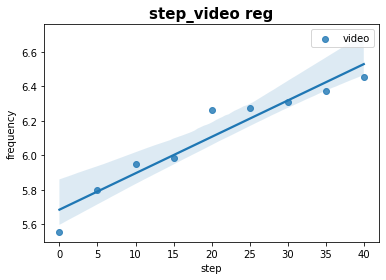

In [10]:
sns.regplot(df["step"], df["video"], label=("video"))
plt.ylabel("frequency")
plt.title("step_video reg", fontdict={"size" : 15, "weight":"bold"})
plt.legend()
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


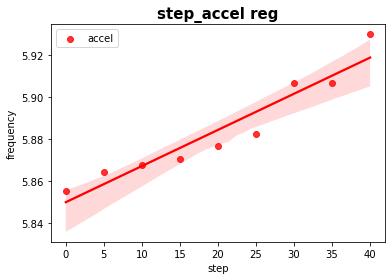

In [16]:
sns.regplot(df["step"], df["accel"], label=("accel"), color="red")
plt.ylabel("frequency")
plt.title("step_accel reg", fontdict={"size" : 15, "weight":"bold"})
plt.legend()
plt.show()

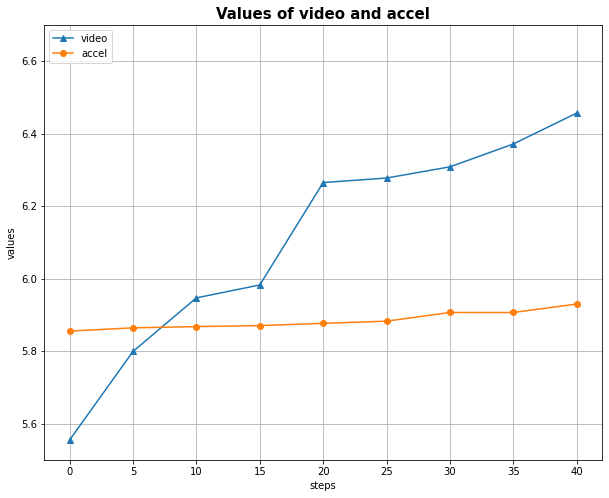

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(df["step"], df["video"], marker="^", label="video")
plt.plot(df["step"], df["accel"], marker="o", label="accel")
plt.legend(loc="upper left")
plt.xlabel("steps")
plt.ylabel("values")
plt.ylim(5.5, 6.7)
plt.title("Values of video and accel", fontdict={"size" : 15, "weight":"bold"})
plt.grid()
plt.show()

# why there is some gap?
1. image blur(comparison : brisque score, blur score)
   - normal image, blurred image, iphone image
2. some frame is skipped because of blur
3. limits of Raspberry pi camera

In [13]:
bri = pd.read_csv("/Users/kyungyunlee/Desktop/ IRP reference/Data/IMAGE_ASSESSMENT_DATA/brisque_scores.csv")
bri

,frame_number,brisque_score
0,0,76.697257
1,1,74.586518
2,2,73.912741
3,3,71.756021
4,4,68.240447
...,...,...
1796,1796,56.255978
1797,1797,56.066327
1798,1798,56.221038
1799,1799,56.329821


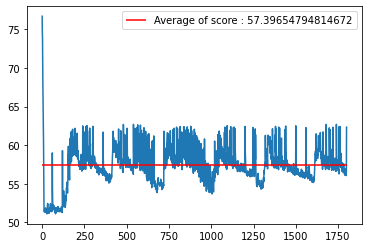

In [14]:
plt.plot(bri["brisque_score"])
plt.hlines(y=bri["brisque_score"].mean(), xmin=0, xmax=1800, colors="red", label="Average of score : {}".format(bri["brisque_score"].mean()))
plt.legend()
# the score near by zero is good picture
# because of motion blur, there is some wave on the graph as well

In [15]:
# image blur check with samples

### resolutions--------------------
# rasp image =  1920 * 1020
# iphone image = 3024 * 4032

from brisque import BRISQUE
import cv2 
print("#----------Brisque Score-----------#")
obj1_iphone = BRISQUE("/Users/kyungyunlee/Desktop/ IRP reference/brisque/IMG_0638.jpg")
obj2_good = BRISQUE("/Users/kyungyunlee/Desktop/ IRP reference/brisque/0piece_middle0.jpg")
obj3_bad = BRISQUE("/Users/kyungyunlee/Desktop/ IRP reference/brisque/0piece_middle1362.jpg")
print("iphone : {}, good : {}, blurred : {}".format(obj1_iphone.score(), obj2_good.score(), obj3_bad.score()))

print("#----------Image Blur-----------#")
image_iphone = cv2.imread("/Users/kyungyunlee/Desktop/ IRP reference/brisque/IMG_0638.jpg")
image_iphone_gray = cv2.cvtColor(image_iphone, cv2.COLOR_BGR2GRAY)
print(f"iphone: {cv2.Laplacian(image_iphone_gray, cv2.CV_64F).var()}")

image_good = cv2.imread("/Users/kyungyunlee/Desktop/ IRP reference/brisque/0piece_middle0.jpg")
image_good_gray = cv2.cvtColor(image_good, cv2.COLOR_BGR2GRAY)
image_good_gray = image_good_gray[500:650, 750:1920]
print(f"good: {cv2.Laplacian(image_good_gray, cv2.CV_64F).var()}")

image_blur = cv2.imread("/Users/kyungyunlee/Desktop/ IRP reference/brisque/0piece_middle1362.jpg")
image_blur_gray = cv2.cvtColor(image_blur, cv2.COLOR_BGR2GRAY)
image_blur_gray = image_blur_gray[500:650, 750:1920]
print(f"blurred: {cv2.Laplacian(image_blur_gray, cv2.CV_64F).var()}")

#----------Brisque Score-----------#
iphone : 21.318302793633706, good : 76.82776974298335, blurred : 62.31098857881895
#----------Image Blur-----------#
iphone: 2113.2614346566
good: 70.44989154036087
blurred: 2.530287685164894


1. cropped the image which is focusing the beam
2. check the brisque score and blur score
3. we can check the blur

# Conclusion
1. Video and accel has the same aspect for bolt looseness(linear positive)
2. bolt looseness and natural frequency has high correlation(almost 0.9 near by 1)
3. If we Rasp camera is developed more in the future, can be useful for vision based
4. If can use sensitive computer vision way with deep learning, It will be good